In [1]:
%matplotlib inline
import pylab as pl
import numpy as np

In [2]:
pl.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

In [3]:
edge_density = ['gnm_random_graph(10000,30000)','gnm_random_graph(10000,40000)','gnm_random_graph(10000,50000)','gnm_random_graph(10000,60000)',
                'gnm_random_graph(10000,70000)','gnm_random_graph(10000,80000)','gnm_random_graph(10000,90000)','gnm_random_graph(10000,100000)']

topology = ['lognormal_graph(10000,3)','barabasi_albert_graph(10000,3)','exponential_graph(10000,3)','gaussian_graph(10000,3)',
            'gnm_random_graph(10000,30000)','watts_strogatz_graph(10000,6,0)','watts_strogatz_graph(10000,6,0.1)','watts_strogatz_graph(10000,6,0.3)',
            'watts_strogatz_graph(10000,6,0.5)','watts_strogatz_graph(10000,6,0.7)','watts_strogatz_graph(10000,6,0.9)','watts_strogatz_graph(10000,6,1)']

decision_rule = ['gnm_random_graph(10000,30000),0.1','gnm_random_graph(10000,30000),0.3','gnm_random_graph(10000,30000),0.5',
                 'gnm_random_graph(10000,30000),0.7','gnm_random_graph(10000,30000),0.9','gnm_random_graph(10000,30000),1']

In [5]:
ur = 'C:\\Users\\XIAOYU\\Desktop\\data\\prediction ability\\'

### averge degree

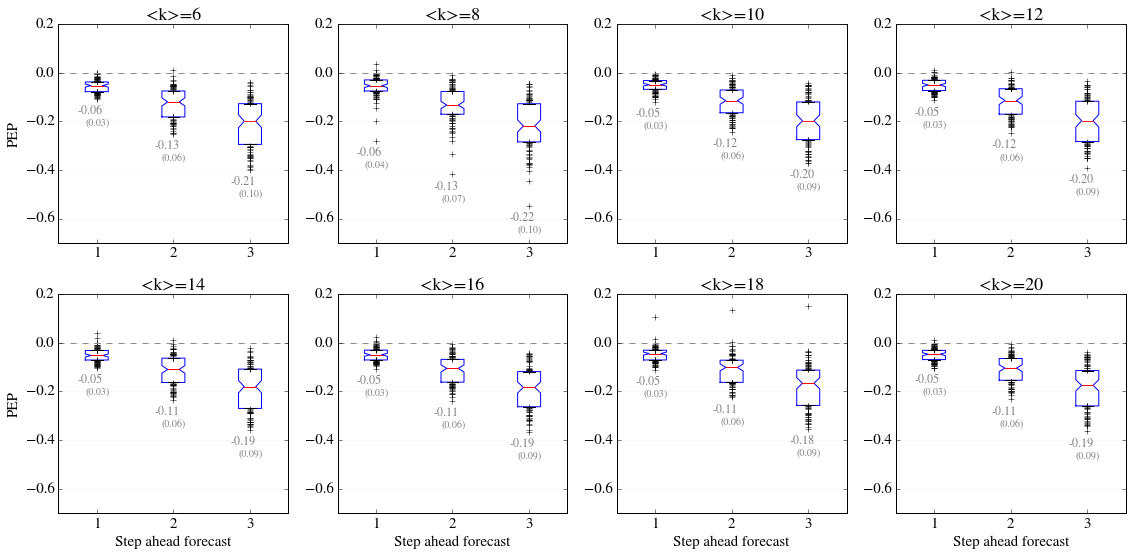

In [34]:
title_cont = ['<k>=6','<k>=8','<k>=10','<k>=12','<k>=14','<k>=16','<k>=18','<k>=20']
fig = pl.figure(figsize = (16,8))
i = 1
for u in edge_density:
    predict_error_percent = np.load(ur+'edge density\\%s-pep.npy'%u)
    B_data = [x[0][1] for x in predict_error_percent]
    C_data_1 = [x[1][0] for x in predict_error_percent]
    C_data_2 = [x[1][1] for x in predict_error_percent]
    C_data_3 = [x[1][2] for x in predict_error_percent]
    data = [C_data_1,C_data_2,C_data_3]

    ax = fig.add_subplot(2,4,i)
    ax.boxplot(data,notch=1,vert =1,whis=0,widths = 0.3,positions = np.arange(1,4) )
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=0.3)
    for j in np.arange(1,4):
        ax.text(j-0.25,np.min(data[j-1])-0.05,'%.2f'%np.mean(data[j-1]),
                 fontsize=12, verticalalignment='center',color='k',alpha=0.5)
        ax.text(j-0.15,np.min(data[j-1])-0.1,'(%.2f)'%np.std(data[j-1]),
                 fontsize=10, verticalalignment='center',color='k',alpha=0.5)
    
    ax.axhline(0,color='gray',ls = '--', lw = 1)
    ax.set_ylim([-0.7,0.2])
    ax.set_title(r'%s'%title_cont[i-1])
    if i >= 5:
        ax.set_xlabel('Step ahead forecast',fontsize=15)
    if i == 1 or i == 5:
        ax.set_ylabel('PEP',fontsize=15)
    
    i = i+1
    
pl.tight_layout()


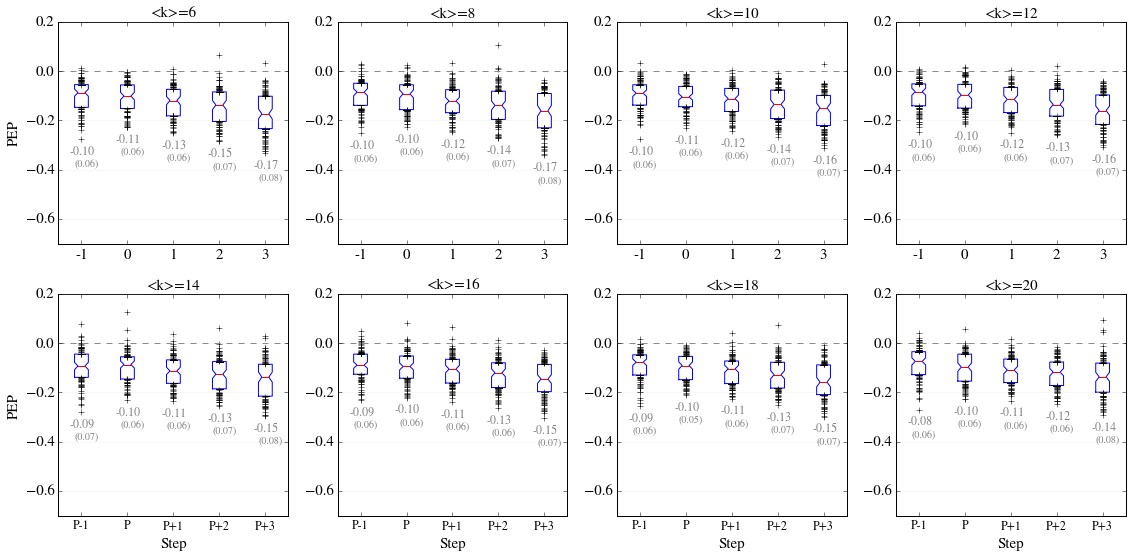

In [12]:
title_cont = ['<k>=6','<k>=8','<k>=10','<k>=12','<k>=14','<k>=16','<k>=18','<k>=20']
fig = pl.figure(figsize = (16,8))
i = 1
for u in edge_density:
    pep = np.load(ur+'edge density/%sx5-pep.npy'%u) 
    pep1 = [x[0] for x in pep]
    pep2 = [x[1] for x in pep]
    pep3 = [x[2] for x in pep]
    pep4 = [x[3] for x in pep]
    pep5 = [x[4] for x in pep]
    data = [pep1,pep2,pep3,pep4,pep5]
        
    ax = fig.add_subplot(2,4,i)
    ax.boxplot(data,notch=1,vert =1,whis=0,widths = 0.3,positions = [-1,0,1,2,3])
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=0.3)
    for j in [-1,0,1,2,3]:
        ax.text(j-0.25,np.min(data[j+1])-0.05,'%.2f'%np.mean(data[j+1]),
                 fontsize=12, verticalalignment='center',color='k',alpha=0.5)
        ax.text(j-0.15,np.min(data[j+1])-0.1,'(%.2f)'%np.std(data[j+1]),
                 fontsize=10, verticalalignment='center',color='k',alpha=0.5)
        
    ax.axhline(0,color='gray',ls = '--', lw = 1)
    ax.set_ylim([-0.7,0.2])
    ax.set_title(r'%s'%title_cont[i-1],fontsize=15)

    if i >= 5:
        ax.set_xlabel(r'Step',fontsize=15)
        ax.set_xticklabels(['P-1', 'P', 'P+1', 'P+2', 'P+3'], fontsize=12)
    if i == 1 or i == 5:
        ax.set_ylabel('PEP',fontsize=15)
    
    i = i+1

pl.tight_layout()

### Topology

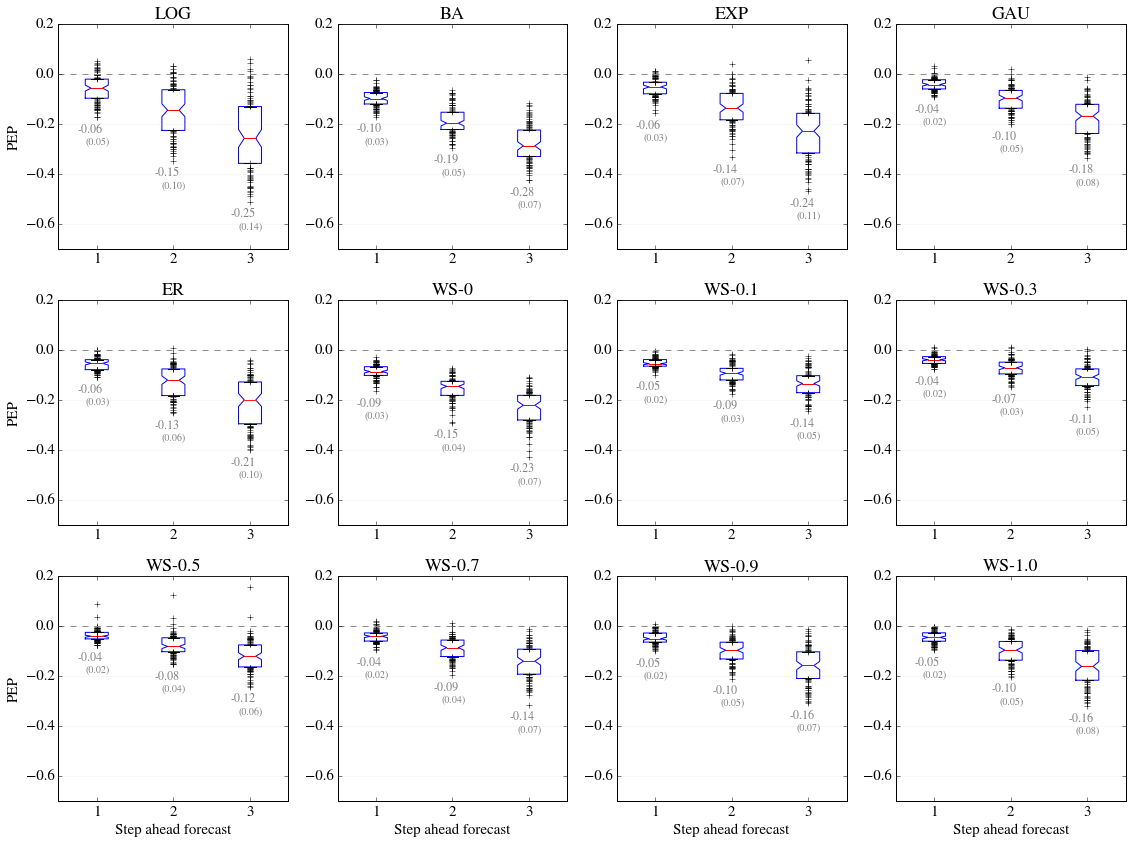

In [35]:
title_cont = ['LOG','BA','EXP','GAU',
                'ER','WS-0','WS-0.1','WS-0.3',
              'WS-0.5','WS-0.7','WS-0.9','WS-1.0']
fig = pl.figure(figsize = (16,12))
i = 1
for u in topology:
    predict_error_percent = np.load(ur+'topology/%s-pep.npy'%u)
    B_data = [x[0][1] for x in predict_error_percent]
    C_data_1 = [x[1][0] for x in predict_error_percent]
    C_data_2 = [x[1][1] for x in predict_error_percent]
    C_data_3 = [x[1][2] for x in predict_error_percent]
    data = [C_data_1,C_data_2,C_data_3]

    ax = fig.add_subplot(3,4,i)
    ax.boxplot(data,notch=1,vert =1,whis=0,widths = 0.3,positions = np.arange(1,4) )
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=0.3)
    for j in np.arange(1,4):
        ax.text(j-0.25,np.min(data[j-1])-0.05,'%.2f'%np.mean(data[j-1]),
                 fontsize=12, verticalalignment='center',color='k',alpha=0.5)
        ax.text(j-0.15,np.min(data[j-1])-0.1,'(%.2f)'%np.std(data[j-1]),
                 fontsize=10, verticalalignment='center',color='k',alpha=0.5)
        
    ax.axhline(0,color='gray',ls = '--', lw = 1)
    ax.set_ylim([-0.7,0.2])
    ax.set_title(r'%s'%title_cont[i-1])
    if i >= 9:
        ax.set_xlabel('Step ahead forecast',fontsize=15)
    if i == 1 or i == 5 or i == 9:
        ax.set_ylabel('PEP',fontsize=15)
    
    i = i+1
    
pl.tight_layout()

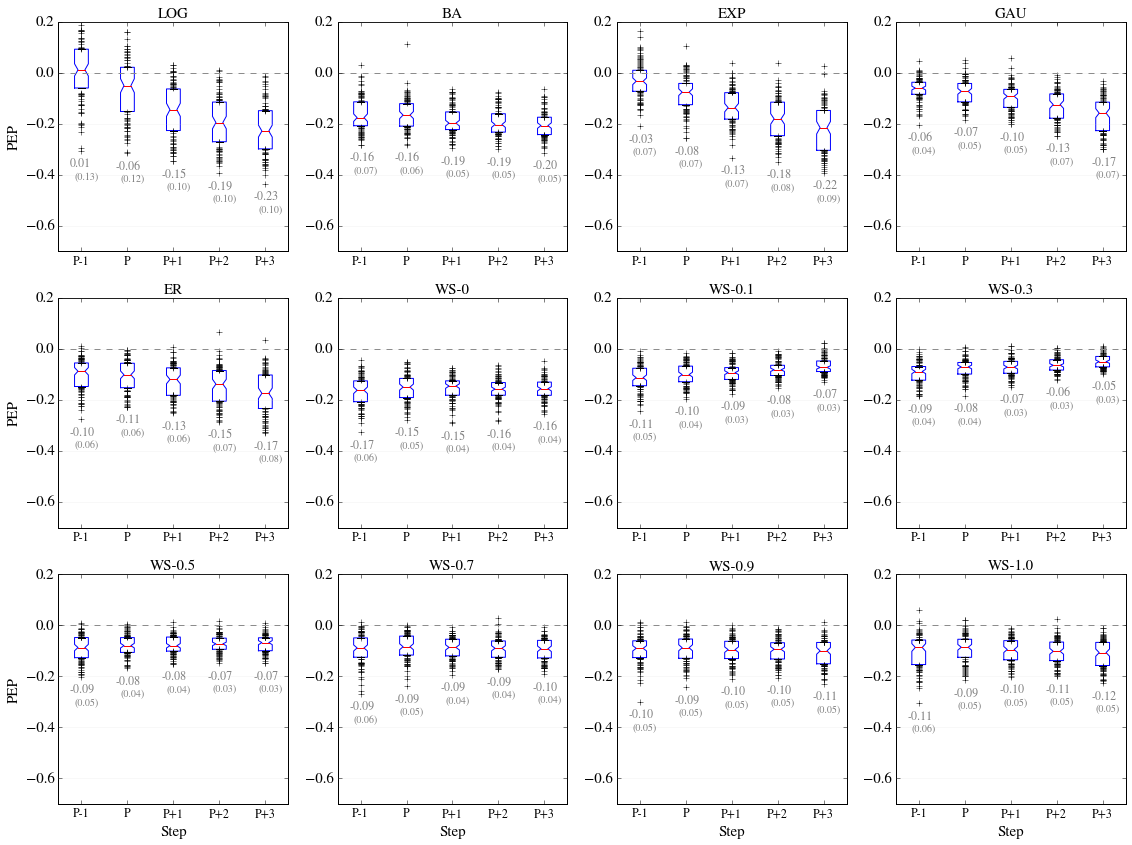

In [37]:
title_cont = ['LOG','BA','EXP','GAU',
              'ER','WS-0','WS-0.1','WS-0.3',
              'WS-0.5','WS-0.7','WS-0.9','WS-1.0']
fig = pl.figure(figsize = (16,12))
i = 1
for u in topology:
    pep = np.load(ur+'topology/%sx5-pep.npy'%u)
    pep1 = [x[0] for x in pep]
    pep2 = [x[1] for x in pep]
    pep3 = [x[2] for x in pep]
    pep4 = [x[3] for x in pep]
    pep5 = [x[4] for x in pep]
    data = [pep1,pep2,pep3,pep4,pep5]
        
    ax = fig.add_subplot(3,4,i)
    ax.boxplot(data,notch=1,vert =1,whis=0,widths = 0.3,positions = [-1,0,1,2,3])
    ax.axhline(0,color='gray',ls = '--', lw = 1)
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=0.3)
    for j in [-1,0,1,2,3]:
        ax.text(j-0.25,np.min(data[j+1])-0.05,'%.2f'%np.mean(data[j+1]),
                 fontsize=12, verticalalignment='center',color='k',alpha=0.5)
        ax.text(j-0.15,np.min(data[j+1])-0.1,'(%.2f)'%np.std(data[j+1]),
                 fontsize=10, verticalalignment='center',color='k',alpha=0.5)
        
    ax.set_ylim([-0.7,0.2])
    ax.set_title(r'%s'%title_cont[i-1],fontsize=15)
    ax.set_xticklabels(['P-1', 'P', 'P+1', 'P+2', 'P+3'], fontsize=12)

    if i >= 9:
        ax.set_xlabel('Step',fontsize=15)
    if i == 1 or i == 5 or i == 9:
        ax.set_ylabel('PEP',fontsize=15)
    
    i = i+1

pl.tight_layout()

### Decision rule

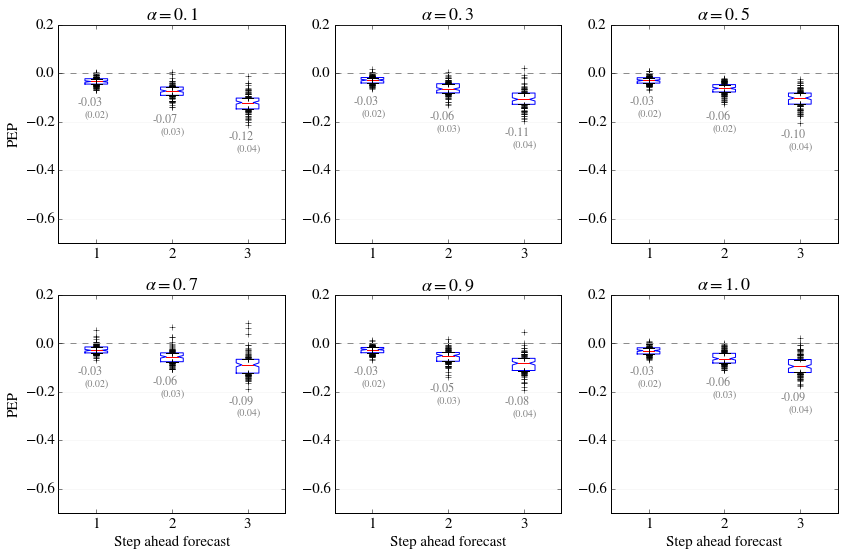

In [38]:
title_cont = ['0.1','0.3','0.5','0.7','0.9','1.0']
fig = pl.figure(figsize = (12,8))
i = 1
for u in decision_rule:
    predict_error_percent = np.load(ur+'decision rule/%s-pep.npy'%u)
    B_data = [x[0][1] for x in predict_error_percent]
    C_data_1 = [x[1][0] for x in predict_error_percent]
    C_data_2 = [x[1][1] for x in predict_error_percent]
    C_data_3 = [x[1][2] for x in predict_error_percent]
    data = [C_data_1,C_data_2,C_data_3]

    ax = fig.add_subplot(2,3,i)
    ax.boxplot(data,notch=1,vert =1,whis=0,widths = 0.3,positions = np.arange(1,4) )
    ax.axhline(0,color='gray',ls = '--', lw = 1)
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=0.3)
    for j in np.arange(1,4):
        ax.text(j-0.25,np.min(data[j-1])-0.05,'%.2f'%np.mean(data[j-1]),
                 fontsize=12, verticalalignment='center',color='k',alpha=0.5)
        ax.text(j-0.15,np.min(data[j-1])-0.1,'(%.2f)'%np.std(data[j-1]),
                 fontsize=10, verticalalignment='center',color='k',alpha=0.5)
        
    ax.set_ylim([-0.7,0.2])
    ax.set_title(r'$\alpha = %s$'%title_cont[i-1])
    if i >= 4:
        ax.set_xlabel('Step ahead forecast',fontsize=15)
    if i == 1 or i == 4:
        ax.set_ylabel('PEP',fontsize=15)
    
    i = i+1
    
pl.tight_layout()

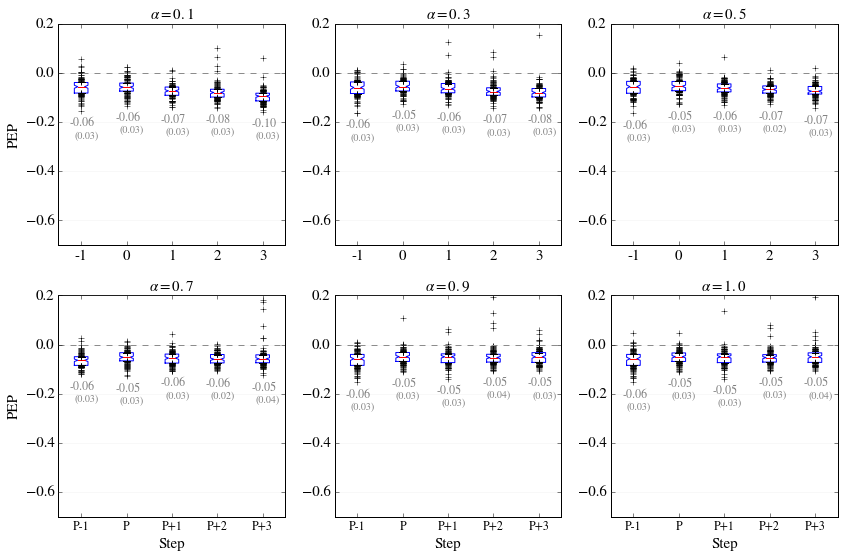

In [39]:
title_cont = ['0.1','0.3','0.5','0.7','0.9','1.0']
fig = pl.figure(figsize = (12,8))
i = 1
for u in decision_rule:
    pep = np.load(ur+'decision rule/%sx5-pep.npy'%u)
    pep1 = [x[0] for x in pep]
    pep2 = [x[1] for x in pep]
    pep3 = [x[2] for x in pep]
    pep4 = [x[3] for x in pep]
    pep5 = [x[4] for x in pep]
    data = [pep1,pep2,pep3,pep4,pep5]
        
    ax = fig.add_subplot(2,3,i)
    ax.boxplot(data,notch=1,vert =1,whis=0,widths = 0.3,positions = [-1,0,1,2,3])
    ax.axhline(0,color='gray',ls = '--', lw = 1)
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=0.3)
    for j in [-1,0,1,2,3]:
        ax.text(j-0.25,np.min(data[j+1])-0.05,'%.2f'%np.mean(data[j+1]),
                 fontsize=12, verticalalignment='center',color='k',alpha=0.5)
        ax.text(j-0.15,np.min(data[j+1])-0.1,'(%.2f)'%np.std(data[j+1]),
                 fontsize=10, verticalalignment='center',color='k',alpha=0.5)
        
    ax.set_ylim([-0.7,0.2])
    ax.set_title(r'$\alpha = %s$'%title_cont[i-1],fontsize=15)

    if i >= 4:
        ax.set_xlabel('Step',fontsize=15)
        ax.set_xticklabels(['P-1', 'P', 'P+1', 'P+2', 'P+3'], fontsize=12)
    if i == 1 or i == 4:
        ax.set_ylabel('PEP',fontsize=15)
    
    i = i+1

pl.tight_layout()

### Consumer heterogeneity

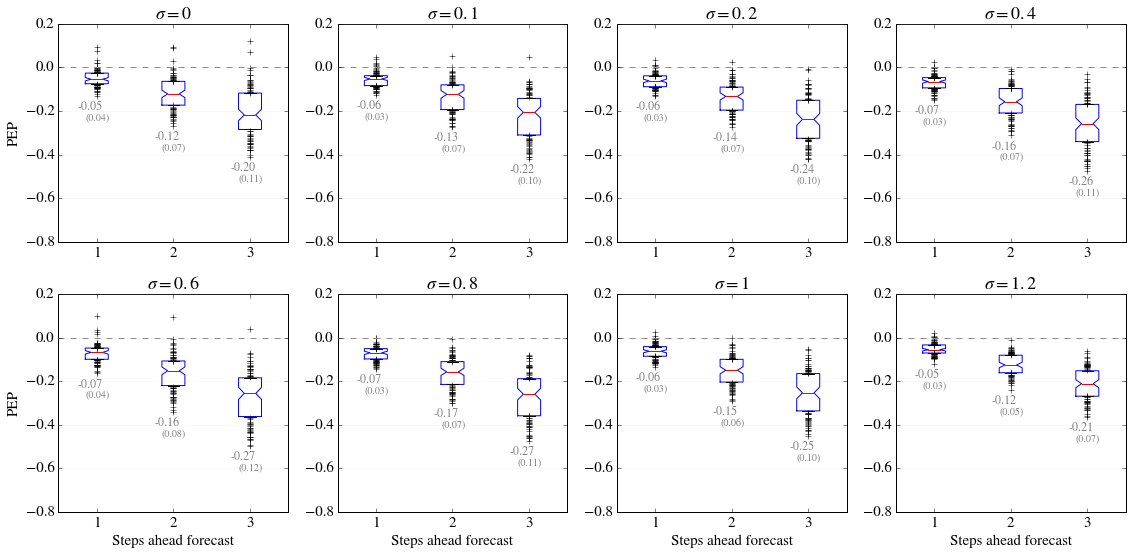

In [40]:
sigma_cont = ['0','0.1','0.2','0.4','0.6','0.8','1','1.2']
fig = pl.figure(figsize = (16,8))
i = 1
for u in sigma_cont:
    predict_error_percent = np.load('sigma-%s-pep.npy'%u)
    B_data = [x[0][1] for x in predict_error_percent]
    C_data_1 = [x[1][0] for x in predict_error_percent]
    C_data_2 = [x[1][1] for x in predict_error_percent]
    C_data_3 = [x[1][2] for x in predict_error_percent]
    data = [C_data_1,C_data_2,C_data_3]

    ax = fig.add_subplot(2,4,i)
    ax.boxplot(data,notch=1,vert =1,whis=0,widths = 0.3,positions = np.arange(1,4) )
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=0.3)
    for j in np.arange(1,4):
        ax.text(j-0.25,np.min(data[j-1])-0.05,'%.2f'%np.mean(data[j-1]),
                 fontsize=12, verticalalignment='center',color='k',alpha=0.5)
        ax.text(j-0.15,np.min(data[j-1])-0.1,'(%.2f)'%np.std(data[j-1]),
                 fontsize=10, verticalalignment='center',color='k',alpha=0.5)
        
    ax.axhline(0,color='gray',ls = '--', lw = 1)
    ax.set_ylim([-0.8,0.2])
    ax.set_title('$\sigma=%s$'%u)
    if i >= 5:
        ax.set_xlabel('Steps ahead forecast')
    if i == 1 or i == 5 or i == 9 or i==13:
        ax.set_ylabel('PEP')
    
    i = i+1
    
pl.tight_layout()

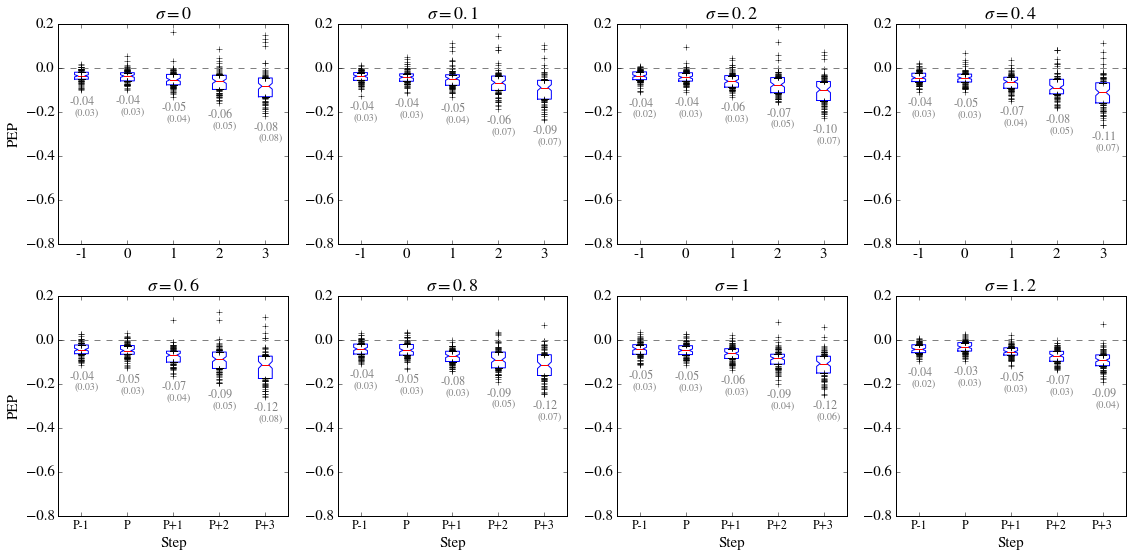

In [45]:
sigma_cont = ['0','0.1','0.2','0.4','0.6','0.8','1','1.2']
fig = pl.figure(figsize =  (16,8))
i = 1
for u in sigma_cont:
    pep = np.load('sigma-%s(x5)-pep.npy'%u) 
    pep1 = [x[0] for x in pep]
    pep2 = [x[1] for x in pep]
    pep3 = [x[2] for x in pep]
    pep4 = [x[3] for x in pep]
    pep5 = [x[4] for x in pep]
    data = [pep1,pep2,pep3,pep4,pep5]
        
    ax = fig.add_subplot(2,4,i)
    ax.boxplot(data,notch=1,vert =1,whis=0,widths = 0.3,positions = [-1,0,1,2,3])
    for j in [-1,0,1,2,3]:
        ax.text(j-0.25,np.min(data[j+1])-0.05,'%.2f'%np.mean(data[j+1]),
             fontsize=12, verticalalignment='center',color='k',alpha=0.5)
        ax.text(j-0.15,np.min(data[j+1])-0.1,'(%.2f)'%np.std(data[j+1]),
             fontsize=10, verticalalignment='center',color='k',alpha=0.5)
    
    ax.axhline(0,color='gray',ls = '--', lw = 1)
    ax.set_ylim([-0.8,0.2])
    ax.set_title('$\sigma=%s$'%u)

    if i >= 5:
        ax.set_xlabel('Step')
        ax.set_xticklabels(['P-1','P', 'P+1', 'P+2', 'P+3'], fontsize=12)
    if i == 1 or i == 5:
        ax.set_ylabel('PEP')
    
    i = i+1

pl.tight_layout()